## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 9: Dimentionality Reduction | Section 45: Kernel Principal Component Analysis (PCA)

Created on Apr  22, 2019
@author: yinka_ola

---

In [1]:
## Remember in Part 3 - Classification, we worked with datasets composed 
## of only two independent variables. We did for two reasons:

## 1. Because we needed two dimensions to visualize better how Machine Learning 
## models worked (by plotting the prediction regions and the prediction boundary 
## for each model).
## 2. Because whatever is the original number of our independent variables, 
## we can often end up with two independent variables by applying an appropriate 
## Dimensionality Reduction technique.

## There are two types of Dimensionality Reduction techniques:
## 1.Feature Selection
## 2.Feature Extraction

## Feature Selection techniques are Backward Elimination, Forward Selection, 
## Bidirectional Elimination, Score Comparison and more. 
## We covered these techniques in Part 2 - Regression.

## In this part we will cover the following Feature Extraction techniques:
## Kernel Principal Component Analysis - Kernel PCA
## Kernel PCA - this is non linear

## ---

## Principal Component Analysis (PCA):
## Most used unsupervised algorithm + most populat dimentionality reduction 

## Application:
## Noise Filtering
## Visualization
## Feature Extraction
## Stock Market Predictions
## Gene data analysis

## goal of PCA:
## 1. identify the patterns in data
## 2. detect correlation b/t variables
## reduce dimension of a d-dimensional dataset by projecting it onto a k
## dimensional subspace (where k< d)
## learn about relationship b/t x and Y values
## find list of principal axes

## PCA in 2D vs 3D: http://setosa.io/ev/principal-component-analysis/

## summary:
## from m independent variable of dataset, PCA extracts p =< m new independent
## that explain the most variance in the dataset regardless of the dependent variable
## b/c dependent variable is not considered, PCA = unsupervised model

## Kernel trick
## 


## ---

#Data Scenario: social networking ads
## Client is launching a brand new SUV
## Running an offer on social media
## What is the probability that they will take up the offer?
## Predict if user will take up the offer or not (buy or not buy)
## Find correlation between age, salary and decision to purchase

## ---

In [8]:
# Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os
#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5
#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [9]:
## Data Preprocessing

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

## independent variable
x = dataset.iloc[:, [2, 3]].values

## dependent variable
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
## must be applied when using dimensionality reduction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [10]:
# Applying PCA
from sklearn.decomposition import PCA
## this is the number of principal components that explains the most variance
pca = PCA(n_components = 2) #create an object of the PCA class
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_ #an attribute of PCA class

In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Predicting the Test set results
y_pred1 = classifier.predict(x_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


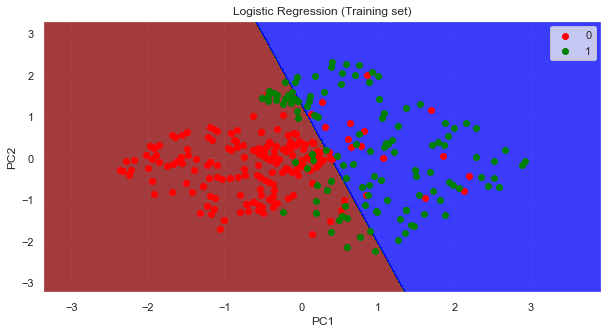

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green', 'blue'))) # add 1 more colur for 3rd classes
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [14]:
# Apply Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf') #gaussian kernel
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [15]:
# Fitting Logistic Regression to the Training set
## note: this can be any classification model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  4]
 [ 4 18]]


In [22]:
## compute accuracy
(58 + 15)/ (58 + 18 + 8) #86.9%

0.8690476190476191

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


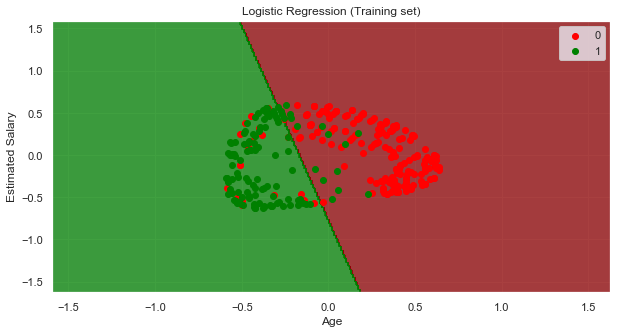

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [20]:
## Observation recall:
## red region: customer did not buy
## green region: customer buy
## here is new new feature space extracted through Kernel PCA, 
## kernel PCA mapped to higher dimension (Gaussian) and mapped back to 2d
## hence data is well separated

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


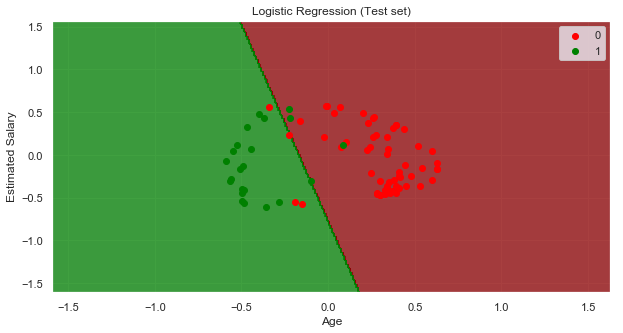

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()